## CONTEX

This notebook is used in cleaning the UK census data for an imaginary town. The aim of achieving clean data is to achieve acurate data sets and to be able to give insights on what should be built in the town and also future investments

## DATA CLEANING
- Data features
- Missing data
- Inconsistent data/Irrelevant features/Repetitive rows
- Outliers

#### Data Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('census_11-2.csv')
df.head() # returns the first 5 rows of the dataframe

House Number      Street First Name Surname Age  \
0            1  Leeds Lane       Sian  Wright  64   
1            1  Leeds Lane   Danielle    Dunn  37   
2            1  Leeds Lane    Anthony  Thorpe  18   
3            2  Leeds Lane    Charlie   Cross  33   
4            2  Leeds Lane     Olivia   Cross  35   

  Relationship to Head of House Marital Status  Gender  \
0                          Head         Single  Female   
1                          None       Divorced  Female   
2                          None         Single    Male   
3                          Head        Married    Male   
4                          Wife        Married  Female   

                        Occupation Infirmity   Religion  
0  Accountant, chartered certified      None   Catholic  
1                Software engineer      None       None  
2                          Student      None        NaN  
3              Mental health nurse      None  Christian  
4          Secretary/administrator      None  Christian

In [2]:
# Calling info() on our dataset tells us tons of information about our data frame 
#like the shape (rows, columns), the data type of our features, and the memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8282 entries, 0 to 8281
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8279 non-null   object
 1   Street                         8282 non-null   object
 2   First Name                     8280 non-null   object
 3   Surname                        8282 non-null   object
 4   Age                            8282 non-null   object
 5   Relationship to Head of House  8282 non-null   object
 6   Marital Status                 6401 non-null   object
 7   Gender                         8282 non-null   object
 8   Occupation                     8282 non-null   object
 9   Infirmity                      8282 non-null   object
 10  Religion                       6356 non-null   object
dtypes: object(11)
memory usage: 711.9+ KB


In [3]:
df.isnull().sum()

House Number                        3
Street                              0
First Name                          2
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1881
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1926
dtype: int64

#### Missing Data
Pandas treat None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful functions for detecting, removing, and replacing null values in Pandas DataFrame :

- isnull()
- dropna()
- fillna()
- replace()

The two common methods used in dealing with missing values are:
- dropping the rows / columns
- imputing them based on other observations i.e. the mean or median

##### Cleaning Age Column

In [4]:
df['Age'].unique()

array(['64', '37', '18', '33', '35', '8', '5', '60', '61', '29', '28',
       '1', '56', '76', '24', '34', '39', '50', '59', '10', '3', '27',
       '57', '42', '23', '58', '36', '38', '40', '55', '52', '11', '19',
       '2', '15', '9', '6', '47', '16', '12', '25', '22', '21', '14', '0',
       '70', '66', '83', '80', '68', '48', '77', '46', '53', '51', '71',
       '32', '43', '20', '85', '87', '81', '92', '30', '63', '65', '49',
       '73', '88', '54', '89', '78', '82', '74', '69', '45', '31', '62',
       '17', '72', '67', '13', '4', '7', '41', '44', '75', '103', '101',
       '102', '109', '26', '86', '84', '94', '90', '79', '96', ' ', '183',
       '105', '4.5', '91', '95', '98', '60.24768262', '100', '-1', 'Four',
       'Fifty Two', '97', '5.25', 'Seventeen', '93', '63.7082276', '104',
       '86.95973188', '85.95973188', '0.3', '1.75', '108'], dtype=object)

In [5]:
# since the data type is object('string')
df["Age"].replace({"Four": "4", "Fifty Two": "52", "Seventeen": "17", " ": "29", "-1": "1"}, inplace=True)

df['Age'].unique()
#df['Age'].describe()

array(['64', '37', '18', '33', '35', '8', '5', '60', '61', '29', '28',
       '1', '56', '76', '24', '34', '39', '50', '59', '10', '3', '27',
       '57', '42', '23', '58', '36', '38', '40', '55', '52', '11', '19',
       '2', '15', '9', '6', '47', '16', '12', '25', '22', '21', '14', '0',
       '70', '66', '83', '80', '68', '48', '77', '46', '53', '51', '71',
       '32', '43', '20', '85', '87', '81', '92', '30', '63', '65', '49',
       '73', '88', '54', '89', '78', '82', '74', '69', '45', '31', '62',
       '17', '72', '67', '13', '4', '7', '41', '44', '75', '103', '101',
       '102', '109', '26', '86', '84', '94', '90', '79', '96', '183',
       '105', '4.5', '91', '95', '98', '60.24768262', '100', '97', '5.25',
       '93', '63.7082276', '104', '86.95973188', '85.95973188', '0.3',
       '1.75', '108'], dtype=object)

In [6]:
new_age_list = []

for age in df['Age']:
    try:
        new_age_list.append(int(age))
    except:
        new_age_list.append(int(float(age)))
#print(new_age_list)  

df['Age'] = new_age_list
df['Age'].unique()

array([ 64,  37,  18,  33,  35,   8,   5,  60,  61,  29,  28,   1,  56,
        76,  24,  34,  39,  50,  59,  10,   3,  27,  57,  42,  23,  58,
        36,  38,  40,  55,  52,  11,  19,   2,  15,   9,   6,  47,  16,
        12,  25,  22,  21,  14,   0,  70,  66,  83,  80,  68,  48,  77,
        46,  53,  51,  71,  32,  43,  20,  85,  87,  81,  92,  30,  63,
        65,  49,  73,  88,  54,  89,  78,  82,  74,  69,  45,  31,  62,
        17,  72,  67,  13,   4,   7,  41,  44,  75, 103, 101, 102, 109,
        26,  86,  84,  94,  90,  79,  96, 183, 105,  91,  95,  98, 100,
        97,  93, 104, 108])

##### Check for outliers in Age

In [7]:
# check the data of age 183 since its greater than 124 years
old_age = df.loc[df['Age'] >= 124]
old_age

House Number        Street First Name Surname  Age  \
1943           30  Martin Plain      Jason  Morris  183   

     Relationship to Head of House Marital Status Gender  \
1943                          Head        Widowed   Male   

                        Occupation Infirmity   Religion  
1943  Retired Engineer, biomedical      None  Christian

In [8]:
# Seeing the '1' in front as a mistake

df["Age"].replace({183: 83}, inplace=True)

In [9]:
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', nan, 'Widowed', ' '], dtype=object)

In [10]:
import numpy as np
# marital status
# view the rows with null values in marital status and look for values to impute
#iterate over df and look for children below age 16 and also with marital status "0" and replace it with "Single"

for ind in df.index:
     if df['Age'][ind] < 16:
            df.at[ind, 'Marital Status'] = 'NA'


In [11]:
df['Marital Status'].isnull().sum()

221

In [12]:
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', 'NA', 'Widowed', nan, ' '],
      dtype=object)

In [13]:
df['Marital Status'].replace(np.nan, "0", inplace=True)


null_marital_status = df.loc[df['Marital Status'] == "0"] # Locate the row that has '0' has marital status value
marital_status_df = null_marital_status.groupby(['Relationship to Head of House', 'Age']).size().reset_index(name='Count')
marital_status_df

Relationship to Head of House  Age  Count
0               Adopted Daughter   16      2
1                       Daughter   16     50
2                       Daughter   17     49
3                       Daughter   21      1
4                  Granddaughter   16      2
5                       Grandson   16      5
6                       Grandson   17      3
7                          Neice   16      1
8                          Neice   17      1
9                         Nephew   17      1
10                           Son   16     58
11                           Son   17     48

In [14]:
#Most individuals above should be single because their relationship to the head ranges from son to granddaughter 

df['Marital Status'].replace('0', 'Single', inplace=True)
df['Marital Status'].unique()

array(['Single', 'Divorced', 'Married', 'NA', 'Widowed', ' '],
      dtype=object)

In [15]:
# Drop these rows because i have no idea about what their marital statuses can be

empty_marital_status = df.loc[df['Marital Status'] == " "] # Locate the row that has ' ' has marital status value
empty_marital_status

House Number              Street First Name   Surname  Age  \
239             6        Walsh Avenue    Brandon  Phillips   60   
6692           35  September Motorway     Joshua   Hopkins   62   

     Relationship to Head of House Marital Status Gender  \
239                           Head                  Male   
6692                          Head                  Male   

                           Occupation Infirmity   Religion  
239   Geophysicist/field seismologist      None  Christian  
6692                 Therapist, drama      None  Methodist

In [16]:
df['Marital Status'].replace(" ", np.nan, inplace=True)

df.dropna(subset = ["Marital Status"], inplace=True)

In [17]:
df['Marital Status'].isnull().sum() #Marital Status cleaned

0

In [18]:
#lets check house number

df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', nan,
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '144

In [19]:
df['House Number'].isnull().sum()

# Drop rows with null house number
df.dropna(subset = ["House Number"], inplace=True)

In [20]:
empty_house_number = df.loc[df['House Number'] == " "] # Locate the row that has ' ' has house number value(it seems there is none)

In [21]:
df['House Number'].isnull().sum()

0

In [22]:
df['House Number'].replace({'Seventy': '70', 'One Hundred and Seven': '107'}, inplace=True) #irregular, inconsistent

In [23]:
df['House Number'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

In [24]:
new_huouse_number_list = []

for number in df['House Number']:
    try:
        new_huouse_number_list.append(int(number))
    except:
        new_huouse_number_list.append(int(float(number)))
#print(new_age_list)  

df['House Number'] = new_huouse_number_list
df['House Number'].unique()  #House number cleaned

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [25]:
# Street

df['Street'].isnull().sum()

0

In [26]:
df['Street'].unique()

array(['Leeds Lane', 'Robertson Road', 'Stanley Road',
       'Sunderland Bypass', 'Walsh Avenue', 'Milldraw Drive', 'Lee Drive',
       'Memorial Spur', 'Cancer Radial', 'Easter Unions', 'Kaur Trail',
       'Reindeer Avenue', 'Brady Dale', 'Cooper Port', 'Anvil Heights',
       'William Drive', 'Dockers Road', 'Scotland Groves',
       'Watson Avenue', 'Newry Walks', 'Castor Road', 'Clarke Avenue',
       'Thompson Corners', 'Martin Plain', 'Open Lane', 'Pilgrim Avenue',
       'Anvil Avenue', 'Wilson Inlet', 'Hall Avenue', 'Libracrib Lane',
       'Testament Street', 'Ranger Drive', 'Hazel Road', 'Benson Road',
       'Cook Avenue', 'Coconut Drive', 'Chapman Viaduct', 'Thomas Lane',
       'Hangar Orchard', 'Parry Drive', 'Adams Vista', 'Robinson Way',
       'Shaw Shore', 'Short Mountains', 'Ali Avenue', 'Rhubarb Road',
       'Roberts Avenue', 'Richards Drive', 'Lunar Terrace',
       'Briggs Avenue', 'Holmes Center', 'Brown Road',
       'Badgerdike Street', 'Christmas Street', '

In [27]:
#street is fine
empty_street = df.loc[df['Street'] == " "]

In [28]:
#EDA FOR FIRST NAME

df['First Name'].isnull().sum()

2

In [29]:
df.dropna(subset = ["First Name"], inplace=True)

In [30]:
df['First Name'].replace(" ", np.nan, inplace=True)

df.dropna(subset = ["First Name"], inplace=True) #Removing data with no first name

In [31]:
#Surname EDA
df['Surname'].isnull().sum()

0

In [32]:
# Removing data with empty surname

df['Surname'].replace(" ", np.nan, inplace=True)

df.dropna(subset = ["Surname"], inplace=True)

In [33]:
#Relationship to Head of House EDA

df['Relationship to Head of House'].unique() #irregular, inconsistent

array(['Head', 'None', 'Wife', 'Daughter', 'Son', 'Husband', 'Lodger',
       'Cousin', 'Grandson', 'Partner', 'Visitor', 'S on',
       'Step-Daughter', 'Granddaughter', 'Neice', 'Step-Son',
       'Adopted Son', 'Sibling', 'Nephew', 'wife', 'cousin', 'Hus band',
       'Adopted Daughter', 'Adopted Grandson', 'Dau ghter', 'lodger',
       'Gran dson', 'he ad', 'Hu-sband', 'son'], dtype=object)

In [34]:
df['Relationship to Head of House'].replace({'Hus band': 'Husband', 'S on': 'Son', 'Dau ghter': 'Daughter', 'Hu-sband': 'Husband', 'son': 'Son', 'he ad': 'Head', 'lodger': 'Lodger', 'Gran dson': 'Grandson'}, inplace=True)

In [35]:
df['Relationship to Head of House'].isnull().sum()

0

In [36]:
no_relation = df.loc[df['Relationship to Head of House'] == 'None'] #Cleaned

In [37]:
# Gender EDA

df['Gender'].isnull().sum()

0

In [38]:
df['Gender'].unique()

array(['Female', 'Male', 'F', 'Fe male', 'M'], dtype=object)

In [39]:
df['Gender'].replace({'F': 'Female', 'M': 'Male', 'Fe male': 'Female'}, inplace=True) #inconsistent or irregular

In [40]:
df['Gender'].unique() #cleaned

array(['Female', 'Male'], dtype=object)

In [41]:
#Occupation EDA

df['Occupation'].unique()

array(['Accountant, chartered certified', 'Software engineer', 'Student',
       ..., 'Microbiologist', 'Retired Engineer, production',
       'Retired Actor'], dtype=object)

In [42]:
df['Occupation'].isnull().sum() # No null values

0

In [43]:
df['Occupation'].replace(" ", np.nan, inplace=True)

df.dropna(subset = ["Occupation"], inplace=True) #Removing rows with empty occupation

In [44]:
empty_occupation = df.loc[df['Occupation'] == ' '] #Cleaned

In [45]:
# Infirmity EDA

df['Infirmity'].unique()

array(['None', 'Physical Dis ability', 'Physical Disability', ' ',
       'Blind', 'Disabled', 'Deaf', 'Unknown Infection', 'none',
       'ment al Disability', 'Mental Disability'], dtype=object)

In [46]:
df['Infirmity'].replace({'Physical Dis ability': 'Physical Disability', 'ment al Disability': 'Mental Disability', 'none':'None'}, inplace=True)

In [47]:
df['Infirmity'].unique()

array(['None', 'Physical Disability', ' ', 'Blind', 'Disabled', 'Deaf',
       'Unknown Infection', 'Mental Disability'], dtype=object)

In [48]:
# Drop rows with blank values

df['Infirmity'].replace(" ", np.nan, inplace=True)

df.dropna(subset = ["Infirmity"], inplace=True)

In [49]:
df['Infirmity'].unique() # Infirmity cleaned

array(['None', 'Physical Disability', 'Blind', 'Disabled', 'Deaf',
       'Unknown Infection', 'Mental Disability'], dtype=object)

In [50]:
# Religion EDA

df['Religion'].isnull().sum()

1917

In [51]:
df['Religion'].unique()

array(['Catholic', 'None', nan, 'Christian', 'Muslim', 'Jewish',
       'Methodist', 'Sith', 'Sikh', 'Undecided', ' ', 'Buddist', 'Quaker',
       'Hindu', 'Pagan', 'Nope', 'Housekeeper'], dtype=object)

In [52]:
#Sith, Quaker, Nope, and Housekeeper are not part of the world's religion

df['Religion'].replace({'Sith': 'Unknown', 'Quaker': 'Unknown', 'Nope':'Unknown', 'Housekeeper': 'Unknown', ' ':"Unknown"}, inplace=True)

#Impute undeclared for religion value of individuals below age 18

for ind in df.index:
     if df['Age'][ind] < 18:
            df.at[ind, 'Religion'] = 'Undeclared'
minority_religion = df.loc[df['Age'] < 18]
minority_religion

House Number            Street First Name  Surname  Age  \
5                2        Leeds Lane    Rachael    Cross    8   
6                2        Leeds Lane     Kieran    Cross    5   
7                2        Leeds Lane     Kieran    Cross    5   
12               4        Leeds Lane       Toby  Johnson    1   
16               6        Leeds Lane     Hollie  Edwards    1   
...            ...               ...        ...      ...  ...   
8254             1  Thompson Bastion    Stewart    Young    9   
8255             1  Thompson Bastion     Leslie    Young    9   
8260             1       Davies Keep   Kayleigh   Cooper   16   
8280             1     Gwynedd Manor       Jane    Allen   14   
8281             1     Gwynedd Manor     Nicola    Allen    9   

     Relationship to Head of House Marital Status  Gender Occupation  \
5                         Daughter             NA  Female    Student   
6                              Son             NA    Male    Student   
7                              Son             NA    Male    Student   
12                             Son             NA    Male      Child   
16                        Daughter             NA  Female      Child   
...                            ...            ...     ...        ...   
8254                           Son             NA    Male    Student   
8255                           Son             NA    Male    Student   
8260                      Daughter         Single  Female    Student   
8280                      Daughter             NA  Female    Student   
8281                      Daughter             NA  Female    Student   

     Infirmity    Religion  
5         None  Undeclared  
6         None  Undeclared  
7         None  Undeclared  
12        None  Undeclared  
16        None  Undeclared  
...        ...         ...  
8254      None  Undeclared  
8255      None  Undeclared  
8260      None  Undeclared  
8280      None  Undeclared  
8281      None  Undeclared  

[1874 rows x 11 columns]

In [53]:
df['Religion'] = df['Religion'].fillna(value='Unknown') # Replaces the null values with 'Unknown'

In [54]:
df['Religion'].unique()

array(['Catholic', 'None', 'Unknown', 'Christian', 'Undeclared', 'Muslim',
       'Jewish', 'Methodist', 'Sikh', 'Undecided', 'Buddist', 'Hindu',
       'Pagan'], dtype=object)

### OUTLIERS

In [55]:
# Checking for a head of house that is less than 18

head_m = df.loc[df['Relationship to Head of House'] == 'Head']
minors = head_m.loc[head_m['Age'] < 18]
minors

House Number         Street First Name          Surname  Age  \
3210            57   Robinson Way    Jessica            Price   15   
5316            10    Walker Path      Lewis  Curtis-Reynolds   17   
5678             7  Johnson Light   Caroline             Wall   15   

     Relationship to Head of House Marital Status  Gender Occupation  \
3210                          Head             NA  Female    Student   
5316                          Head        Married    Male    Student   
5678                          Head             NA  Female    Student   

     Infirmity    Religion  
3210      None  Undeclared  
5316      None  Undeclared  
5678      None  Undeclared

In [56]:
#Check all members of the household and remove them

head_15 = df.loc[df['House Number'] == 57]
robinson_way_street = head_15.loc[head_15['Street'] == 'Robinson Way']
robinson_way_street

House Number        Street First Name Surname  Age  \
3210            57  Robinson Way    Jessica   Price   15   
3211            57  Robinson Way  Frederick   Price   19   
3212            57  Robinson Way    Annette   Smith   56   
3213            57  Robinson Way      Conor   James   52   
3214            57  Robinson Way      Ellie   Finch   28   
3215            57  Robinson Way      Emily  Miller   56   

     Relationship to Head of House Marital Status  Gender  \
3210                          Head             NA  Female   
3211                       Husband        Married    Male   
3212                        Lodger         Single  Female   
3213                        Lodger         Single    Male   
3214                       Visitor         Single  Female   
3215                        Lodger         Single  Female   

                  Occupation Infirmity    Religion  
3210                 Student      None  Undeclared  
3211      University Student      None        None  
3212     Administrator, arts      None   Christian  
3213      Restaurant manager      None   Christian  
3214  Audiological scientist      None    Catholic  
3215  Operational researcher      None        None

In [57]:
df.drop([3210, 3211, 3212, 3213, 3214, 3215], inplace=True)

In [58]:
head_17 = df.loc[df['House Number'] == 10]
walker_path_street = head_17.loc[head_17['Street'] == 'Walker Path']
walker_path_street

House Number       Street First Name          Surname  Age  \
5316            10  Walker Path      Lewis  Curtis-Reynolds   17   
5317            10  Walker Path      Shaun  Curtis-Reynolds   19   
5318            10  Walker Path       Dean  Curtis-Reynolds    0   
5319            10  Walker Path   Ashleigh              Ali   29   

     Relationship to Head of House Marital Status  Gender          Occupation  \
5316                          Head        Married    Male             Student   
5317                       Husband        Married    Male  University Student   
5318                           Son             NA    Male               Child   
5319                        Lodger         Single  Female          Unemployed   

     Infirmity    Religion  
5316      None  Undeclared  
5317      None     Unknown  
5318      None  Undeclared  
5319      None    Catholic

In [59]:
df.drop([5316, 5317, 5318, 5319], inplace=True)

In [60]:
head_7 = df.loc[df['House Number'] == 7]
Johnson_light_street = head_7.loc[head_7['Street'] == 'Johnson Light']
Johnson_light_street

House Number         Street First Name Surname  Age  \
5678             7  Johnson Light   Caroline    Wall   15   
5679             7  Johnson Light      Harry    Wall   19   
5680             7  Johnson Light       Alex    Wall    0   

     Relationship to Head of House Marital Status  Gender          Occupation  \
5678                          Head             NA  Female             Student   
5679                       Husband        Married    Male  University Student   
5680                           Son             NA    Male               Child   

     Infirmity    Religion  
5678      None  Undeclared  
5679      None     Unknown  
5680      None  Undeclared

In [61]:
df.drop([5678, 5679, 5680], inplace=True)

In [62]:
#Checking for unemployed over 65 years old i.e outliers in occupation

widowed = df.loc[df['Occupation'] == 'Retired']
df['Occupation'].unique()

array(['Accountant, chartered certified', 'Software engineer', 'Student',
       ..., 'Retired Psychiatric nurse', 'Retired Engineer, production',
       'Retired Actor'], dtype=object)

In [63]:
#unemployed count by age

unemployed = df.loc[df['Occupation'] == 'Unemployed']
unemployed

House Number              Street First Name  Surname  Age  \
11               4          Leeds Lane     Hollie  Johnson   28   
28               8          Leeds Lane    Stephen    Jones   57   
36              11          Leeds Lane     Elliot     Dunn   40   
43              15          Leeds Lane      Carly    Brown   58   
72               1        Stanley Road     Sandra    Flynn   28   
...            ...                 ...        ...      ...  ...   
8202             1  Edwards Obervatory    Jasmine     Miah   27   
8220             1        Brooks House       Alan    Smith   26   
8221             1        Brooks House       Gary   Cooper   34   
8267             1       Gwynedd Manor    Valerie    Allen   49   
8268             1       Gwynedd Manor       Leah    Allen   42   

     Relationship to Head of House Marital Status  Gender  Occupation  \
11                            Wife        Married  Female  Unemployed   
28                          Lodger         Single    Male  Unemployed   
36                            Head       Divorced    Male  Unemployed   
43                            Head       Divorced  Female  Unemployed   
72                            Head         Single  Female  Unemployed   
...                            ...            ...     ...         ...   
8202                      Daughter       Divorced  Female  Unemployed   
8220                          None         Single    Male  Unemployed   
8221                          None         Single    Male  Unemployed   
8267                      Daughter         Single  Female  Unemployed   
8268                      Daughter       Divorced  Female  Unemployed   

     Infirmity   Religion  
11        None  Christian  
28        None     Jewish  
36        None   Catholic  
43        None   Catholic  
72        None       None  
...        ...        ...  
8202      None  Christian  
8220      None  Methodist  
8221      None       None  
8267      None  Christian  
8268      None  Christian  

[526 rows x 11 columns]

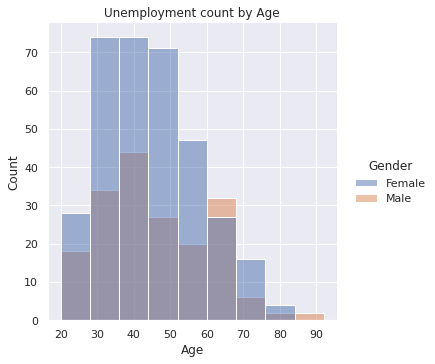

In [64]:
#Visualizing outliers in occupation category
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.displot(data=unemployed, x='Age', hue='Gender', binwidth=8).set(title='Unemployment count by Age')
plt.savefig('Outlier-in-occupation.png')

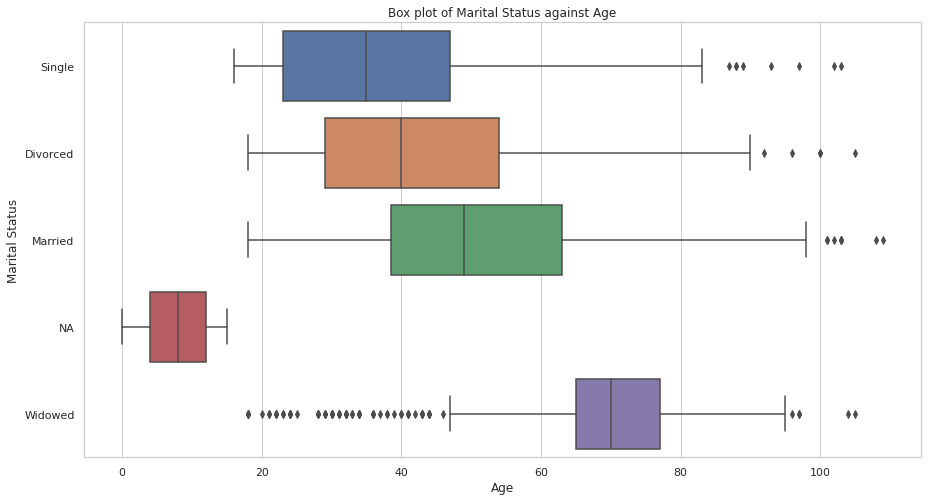

In [65]:
#Checking for widows that are between age 16 to 22 i.e outliers in marital status

import seaborn as sns

sns.set_style("whitegrid")

sns.boxplot(x = 'Age', y= 'Marital Status', data = df).set(title='Box plot of Marital Status against Age')
plt.savefig('Outlier-in-marital-status.png')

In [66]:
# Imputing appropriate values for outliers
# For individuals between the age 16 and 25 who are widowed, marital status will be imputed to single

for ind in df.index:
     if df['Age'][ind] >= 16 and df['Age'][ind] <= 25 and df['Marital Status'][ind] == 'Widowed':
            df.at[ind, 'Marital Status'] = 'Single'


In [67]:
# For individuals above age 65 who are unemployed, occupation value will be imputed to retired.

for ind in df.index:
     if df['Age'][ind] >= 66 and df['Occupation'][ind] == 'Unemployed':
            df.at[ind, 'Occupation'] = 'Retired, Unemployed'

In [68]:
df.isnull().sum()

House Number                     0
Street                           0
First Name                       0
Surname                          0
Age                              0
Relationship to Head of House    0
Marital Status                   0
Gender                           0
Occupation                       0
Infirmity                        0
Religion                         0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8247 entries, 0 to 8281
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8247 non-null   int64 
 1   Street                         8247 non-null   object
 2   First Name                     8247 non-null   object
 3   Surname                        8247 non-null   object
 4   Age                            8247 non-null   int64 
 5   Relationship to Head of House  8247 non-null   object
 6   Marital Status                 8247 non-null   object
 7   Gender                         8247 non-null   object
 8   Occupation                     8247 non-null   object
 9   Infirmity                      8247 non-null   object
 10  Religion                       8247 non-null   object
dtypes: int64(2), object(9)
memory usage: 1.0+ MB


In [70]:
## Cleaned

## POPULATION DEMOGRAPHICS

In [71]:
Retired = df.loc[df['Occupation'].str.contains("Retired", case=False)]
retired_num = len(Retired)
print(retired_num)

783


In [72]:
Students = df.loc[df['Occupation'] == 'Student']
students_num = len(Students)
print(students_num)

1561


In [73]:
uni_student = df.loc[df['Occupation'] == 'University Student']
uni_student_num = len(uni_student)
print(uni_student_num)

535


In [74]:
children = df.loc[df['Occupation'] == 'Child']
children_num = len(children)
print(children_num)

415


In [75]:
unemployed = df.loc[df['Occupation'] == 'Unemployed']
unemployed_num = len(unemployed)
print(unemployed_num)

480


In [76]:
total_population = len(df)
print(total_population)

8247


In [77]:
# substracting number of retired, students, unemployed and children from total population gives the number of employed

employed = total_population - (retired_num + students_num + uni_student_num + children_num + unemployed_num)
print(employed)

4473


In [78]:
occupation_ = pd.DataFrame([['Employed', 4473], ['Unemployed', 480],['Student(Uni)', 535], ['Child', 415], ['Student(Child)', 1561], ['Retired', 783]],
                   columns=['Employment status', 'Count'])
occupation_

Employment status  Count
0          Employed   4473
1        Unemployed    480
2      Student(Uni)    535
3             Child    415
4    Student(Child)   1561
5           Retired    783

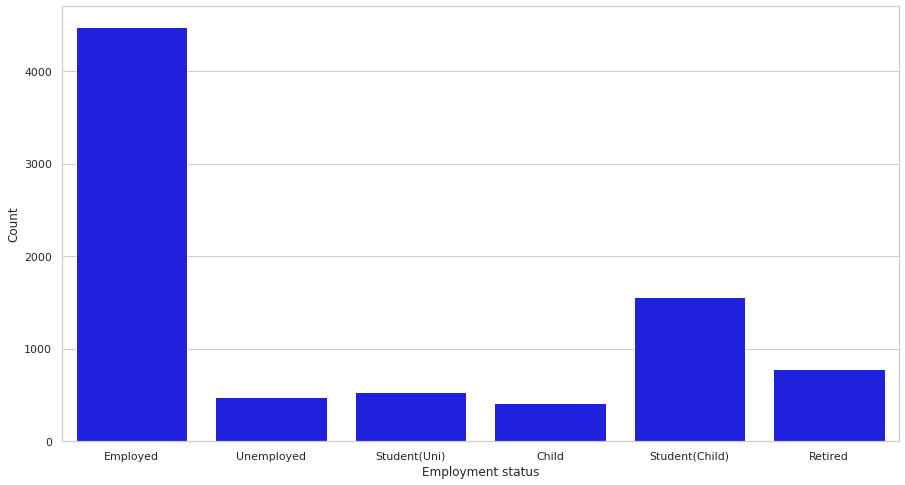

In [79]:
import seaborn as sns

sns.barplot(x='Employment status', y='Count', data=occupation_,
color=('blue'))
plt.savefig('employment-category.png')

In [80]:
employed_percentage = (employed/total_population) * 100
print('employed%',employed_percentage)
unemployed_percentage = (unemployed_num/total_population)*100
print('unemployed%',unemployed_percentage)
retired_percentage = (retired_num/total_population)*100
print('retired%',retired_percentage)
children_percentage = (children_num/total_population)* 100
print('child%',children_percentage)
uni_student_percentage = (uni_student_num/total_population)* 100
print('uni student%',uni_student_percentage)
student_percentage_child = (students_num/total_population)* 100
print('student(child)%',student_percentage_child)

employed% 54.2379046926155
unemployed% 5.8202982902873766
retired% 9.494361586031284
child% 5.032132896810962
uni student% 6.487207469382805
student(child)% 18.928095064872075


In [81]:
from pandas_profiling import ProfileReport
census = ProfileReport(df)
census

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### POPULATION PYRAMID PLOT

In [82]:
#Extract age groups, male and female within age group for population pyramid


import seaborn as sns

count0_5M = 0
count5_10M = 0
count10_15M = 0
count15_20M = 0
count20_25M = 0
count25_30M = 0
count30_35M = 0
count35_40M = 0
count40_45M = 0
count45_50M = 0
count50_55M = 0
count55_60M = 0
count60_65M = 0
count65_70M = 0
count70_75M = 0
count75_80M = 0
count80_85M = 0
count85_90M = 0
count90_95M = 0
count95_100M = 0
count100_plusM = 0


count0_5F = 0
count5_10F = 0
count10_15F = 0
count15_20F = 0
count20_25F = 0
count25_30F = 0
count30_35F = 0
count35_40F = 0
count40_45F = 0
count45_50F = 0
count50_55F = 0
count55_60F = 0
count60_65F = 0
count65_70F = 0
count70_75F = 0
count75_80F = 0
count80_85F = 0
count85_90F = 0
count90_95F = 0
count95_100F = 0
count100_plusF = 0


female_count = []
male_count = []
age_bracket = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']


for ind in df.index:
    if df['Age'][ind] >= 0 and df['Age'][ind] <= 4:
            if df['Gender'][ind] == 'Male':
                count0_5M += 1
            elif df['Gender'][ind] == 'Female':
                count0_5F += 1
    elif df['Age'][ind] >= 5 and df['Age'][ind] <= 9:
        if df['Gender'][ind] == 'Male':
                count5_10M += 1
        elif df['Gender'][ind] == 'Female':
                count5_10F += 1
    elif df['Age'][ind] >= 10 and df['Age'][ind] <= 14:
        if df['Gender'][ind] == 'Male':
                count10_15M += 1
        elif df['Gender'][ind] == 'Female':
                count10_15F += 1
    elif df['Age'][ind] >= 15 and df['Age'][ind] <= 19:
        if df['Gender'][ind] == 'Male':
                count15_20M += 1
        elif df['Gender'][ind] == 'Female':
                count15_20F += 1
    elif df['Age'][ind] >= 20 and df['Age'][ind] <= 24:
        if df['Gender'][ind] == 'Male':
                count20_25M += 1
        elif df['Gender'][ind] == 'Female':
                count20_25F += 1
    elif df['Age'][ind] >= 25 and df['Age'][ind] <= 29:
        if df['Gender'][ind] == 'Male':
                count25_30M += 1
        elif df['Gender'][ind] == 'Female':
                count25_30F += 1
    elif df['Age'][ind] >= 30 and df['Age'][ind] <= 34:
        if df['Gender'][ind] == 'Male':
                count30_35M += 1
        elif df['Gender'][ind] == 'Female':
                count30_35F += 1
    elif df['Age'][ind] >= 35 and df['Age'][ind] <= 39:
        if df['Gender'][ind] == 'Male':
                count35_40M += 1
        elif df['Gender'][ind] == 'Female':
                count35_40F += 1
    elif df['Age'][ind] >= 40 and df['Age'][ind] <= 44:
        if df['Gender'][ind] == 'Male':
                count40_45M += 1
        elif df['Gender'][ind] == 'Female':
                count40_45F += 1
    elif df['Age'][ind] >= 45 and df['Age'][ind] <= 49:
        if df['Gender'][ind] == 'Male':
                count45_50M += 1
        elif df['Gender'][ind] == 'Female':
                count45_50F += 1
    elif df['Age'][ind] >= 50 and df['Age'][ind] <= 54:
        if df['Gender'][ind] == 'Male':
                count50_55M += 1
        elif df['Gender'][ind] == 'Female':
                count50_55F += 1
    elif df['Age'][ind] >= 55 and df['Age'][ind] <= 59:
        if df['Gender'][ind] == 'Male':
                count55_60M += 1
        elif df['Gender'][ind] == 'Female':
                count55_60F += 1
    elif df['Age'][ind] >= 60 and df['Age'][ind] <= 64:
        if df['Gender'][ind] == 'Male':
                count60_65M += 1
        elif df['Gender'][ind] == 'Female':
                count60_65F += 1
    elif df['Age'][ind] >= 65 and df['Age'][ind] <= 69:
        if df['Gender'][ind] == 'Male':
                count65_70M += 1
        elif df['Gender'][ind] == 'Female':
                count65_70F += 1
    elif df['Age'][ind] >= 70 and df['Age'][ind] <= 74:
        if df['Gender'][ind] == 'Male':
                count70_75M += 1
        elif df['Gender'][ind] == 'Female':
                count70_75F += 1
    elif df['Age'][ind] >= 75 and df['Age'][ind] <= 79:
        if df['Gender'][ind] == 'Male':
                count75_80M += 1
        elif df['Gender'][ind] == 'Female':
                count75_80F += 1
    elif df['Age'][ind] >= 80 and df['Age'][ind] <= 84:
        if df['Gender'][ind] == 'Male':
                count80_85M += 1
        elif df['Gender'][ind] == 'Female':
                count80_85F += 1
    elif df['Age'][ind] >= 85 and df['Age'][ind] <= 89:
        if df['Gender'][ind] == 'Male':
                count85_90M += 1
        elif df['Gender'][ind] == 'Female':
                count85_90F += 1
    elif df['Age'][ind] >= 90 and df['Age'][ind] <= 94:
        if df['Gender'][ind] == 'Male':
                count90_95M += 1
        elif df['Gender'][ind] == 'Female':
                count90_95F += 1
    elif df['Age'][ind] >= 95 and df['Age'][ind] <= 99:
        if df['Gender'][ind] == 'Male':
                count95_100M += 1
        elif df['Gender'][ind] == 'Female':
                count95_100F += 1            
    elif df['Age'][ind] >= 100:
        if df['Gender'][ind] == 'Male':
                count100_plusM += 1
        elif df['Gender'][ind] == 'Female':
                count100_plusF += 1
    
female_count.extend([count0_5F,count5_10F,count10_15F,count15_20F,count20_25F,count25_30F,count30_35F,count35_40F,count40_45F,
count45_50F,count50_55F,count55_60F,count60_65F,count65_70F,count70_75F,count75_80F,count80_85F,count85_90F,count90_95F,
count95_100F, count100_plusF])

male_count.extend([count0_5M,count5_10M,count10_15M, count15_20M, count20_25M,count25_30M, count30_35M, count35_40M,
count40_45M, count45_50M, count50_55M, count55_60M, count60_65M, count65_70M, count70_75M, count75_80M, count80_85M,
count85_90M, count90_95M, count95_100M, count100_plusM])

male_count2 = list(reversed(male_count))
female_count2 = list(reversed(female_count))
print('male',male_count2)
print('female', female_count2)

male [9, 10, 15, 34, 64, 75, 114, 145, 195, 216, 232, 286, 296, 317, 277, 256, 281, 299, 274, 309, 205]
female [6, 3, 7, 43, 63, 80, 134, 166, 196, 239, 303, 344, 374, 352, 319, 284, 353, 328, 262, 272, 210]


In [83]:
sum = 0
for x in male_count:
    sum += x
print(sum)

3909


In [84]:
sum = 0
for x in female_count:
    sum += x
print(sum)

4338


In [85]:
# Population pyramid plot

data = {'Age': age_bracket,
        'Male': male_count2,
        'Female': female_count2
       }

df_population = pd.DataFrame(data)
df_population

Age  Male  Female
0    100+     9       6
1   95-99    10       3
2   90-94    15       7
3   85-89    34      43
4   80-84    64      63
5   75-79    75      80
6   70-74   114     134
7   65-69   145     166
8   60-64   195     196
9   55-59   216     239
10  50-54   232     303
11  45-49   286     344
12  40-44   296     374
13  35-39   317     352
14  30-34   277     319
15  25-29   256     284
16  20-24   281     353
17  15-19   299     328
18  10-14   274     262
19    5-9   309     272
20    0-4   205     210

In [86]:
df_population['Male'] = df_population['Male'].mul(-1)
df_population['Male'].unique()

array([  -9,  -10,  -15,  -34,  -64,  -75, -114, -145, -195, -216, -232,
       -286, -296, -317, -277, -256, -281, -299, -274, -309, -205])

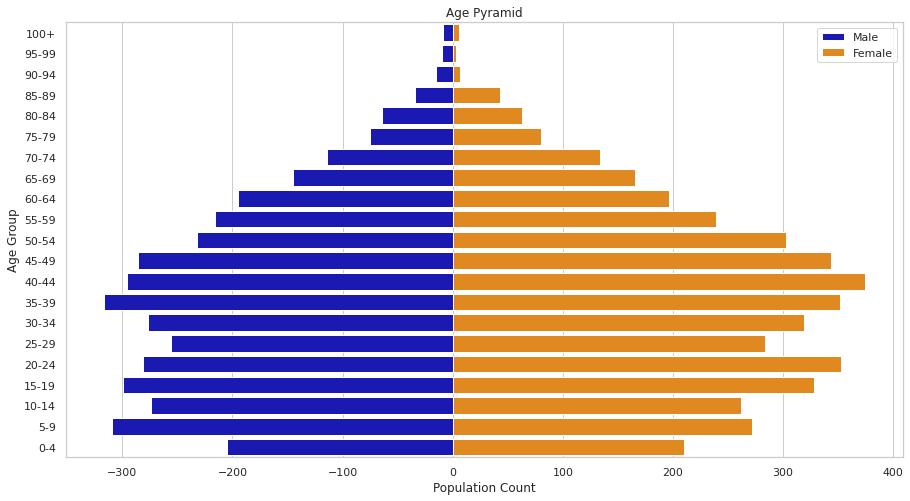

In [87]:
import matplotlib.pyplot as plt

age_pyramid = sns.barplot(x='Male', y='Age', data=df_population, order=age_bracket, 
color=('mediumblue'), label='Male') 
 
age_pyramid = sns.barplot(x='Female', y='Age', data=df_population, order=age_bracket, 
color=('darkorange'), label='Female') 
 
age_pyramid.legend() 
plt.title('Age Pyramid') 

age_pyramid.set(xlabel='Population Count', ylabel='Age Group') 

plt.savefig('population-pyramid.png')

## STATISTICAL ANALYSIS

#### GROWTH RATE

To calculate the growth rate, we need to calculate the birth rate and death rate

In [88]:
totalpopulation = len(df)
print(totalpopulation)

8247


##### CRUDE BIRTH RATE

crude birth rate per thousand = (number of births in the year / total population in the year)  X 1000

In [89]:
number_of_births = len(df[df['Age'] == 0])
crudebirthrate = (number_of_births/totalpopulation)*1000
crudebirthrate

8.609191221050079

#### Compare previous birth rates to the current birth rate

In [90]:
babies0yr = df['Age'] == 0
babies4yr = df['Age'] == 4
babies8yr = df['Age'] == 8


crude_birth_rate_current = (len(df[babies0yr])/totalpopulation)*1000 

crude_birth_rate_4year = (len(df[babies4yr])/len(df))*1000

print(f"Present Crude Birthrate per 1000: {crude_birth_rate_current}")
print(f"Previous Crude Birthrate per 1000: {crude_birth_rate_4year}")


print(f"Present CBR Change from Previous per 1000: {crude_birth_rate_current-crude_birth_rate_4year}")


Present Crude Birthrate per 1000: 8.609191221050079
Previous Crude Birthrate per 1000: 11.761852794955741
Present CBR Change from Previous per 1000: -3.1526615739056627


##### FERTILITY RATE

In [91]:
# define women of childbearing age, corresponding to above year gaps

age2529 = (df['Age'].between(25,29)) & (df['Gender'] == 'Female')
age3034 = (df['Age'].between(30,34)) & (df['Gender'] == 'Female')
age3540 = (df['Age'].between(35,39)) & (df['Gender'] == 'Female')

# calculating age-specific fertility rate

asfr2529 = (len(df[babies0yr])/len(df[age2529]))*1000
asfr3034 = (len(df[babies4yr])/len(df[age3034]))*1000
asfr3540 = (len(df[babies8yr])/len(df[age3540]))*1000

print(f"ASFR 25-29 per 1000 {asfr2529}")
print(f"ASFR 30-34 per 1000 {asfr3034}")
print(f"ASFR 35-40 per 1000 {asfr3540}")

ASFR 25-29 per 1000 250.0
ASFR 30-34 per 1000 304.0752351097178
ASFR 35-40 per 1000 315.3409090909091


  #### DEATH RATE

In [92]:
# Assuming we have the same number of people having a particular age as that of the previous year. 
# I will be calculating the difference between the number of in last year age and this current year age

aging_population = df[df['Age'].between(65,110)].groupby('Age').size().sort_index(ascending=False)
aging_population

Age
109     1
108     1
105     2
104     1
103     4
102     2
101     2
100     2
98      3
97      3
96      3
95      4
94      4
93      3
92      4
91      2
90      9
89     15
88     23
87     13
86     15
85     11
84     24
83     32
82     23
81     21
80     27
79     25
78     32
77     35
76     28
75     35
74     43
73     48
72     48
71     56
70     53
69     58
68     53
67     76
66     64
65     60
dtype: int64

In [93]:
# shift the ages up one to mimic last year's 'counts' per age

calculatedages = aging_population.shift(-1)
calculatedages

Age
109     1.0
108     2.0
105     1.0
104     4.0
103     2.0
102     2.0
101     2.0
100     3.0
98      3.0
97      3.0
96      4.0
95      4.0
94      3.0
93      4.0
92      2.0
91      9.0
90     15.0
89     23.0
88     13.0
87     15.0
86     11.0
85     24.0
84     32.0
83     23.0
82     21.0
81     27.0
80     25.0
79     32.0
78     35.0
77     28.0
76     35.0
75     43.0
74     48.0
73     48.0
72     56.0
71     53.0
70     58.0
69     53.0
68     76.0
67     64.0
66     60.0
65      NaN
dtype: float64

In [94]:
diff = aging_population - calculatedages

# change it to a dataframe...

diff = diff.reset_index(name='Count')

# only interested in deaths - not emigration!! So we want minus counts only

deaths = diff[diff['Count'] < 0]
deaths

Age  Count
1   108   -1.0
3   104   -3.0
7   100   -1.0
10   96   -1.0
13   93   -1.0
15   91   -7.0
16   90   -6.0
17   89   -8.0
19   87   -2.0
21   85  -13.0
22   84   -8.0
25   81   -6.0
27   79   -7.0
28   78   -3.0
30   76   -7.0
31   75   -8.0
32   74   -5.0
34   72   -8.0
36   70   -5.0
38   68  -23.0

In [95]:
deathrate = abs(((deaths['Count']).sum())/totalpopulation)*1000
deathrate

14.914514368861404

In [96]:
# calculate the number of immigrants and emmigrant in other to get the growth rate
# count the number of single lodgers and visitors that has an occupation, they are the potential immigrants i.e check whether they will finally stay or leave.


lodgers = df.loc[df['Relationship to Head of House'] == 'Lodger']
employed_lodgers = lodgers.loc[lodgers['Occupation'] != 'Unemployed']
employed_lodgers_not_uni_students = employed_lodgers.loc[employed_lodgers['Occupation'] != 'University Student']
employed_lodgers_not_uni_students_single = employed_lodgers_not_uni_students.loc[employed_lodgers_not_uni_students['Marital Status'] == 'Single']
grouped = employed_lodgers_not_uni_students_single.groupby(['Relationship to Head of House', 'Marital Status', 'Occupation']).size().reset_index(name='Count')

# summation of immigrants i.e lodgers that are single, not students and not unemployed
lodgers_count = grouped['Count'].sum()
lodgers_count

173

In [97]:
visitors = df.loc[df['Relationship to Head of House'] == 'Visitor']
employed_visitors = visitors.loc[visitors['Occupation'] != 'Unemployed']
employed_visitors_not_uni_students = employed_visitors.loc[employed_visitors['Occupation'] != 'University Student']
employed_visitors_not_uni_students_single = employed_visitors_not_uni_students.loc[employed_visitors_not_uni_students['Marital Status'] == 'Single']
grouped_visitors = employed_visitors_not_uni_students_single.groupby(['Relationship to Head of House', 'Marital Status', 'Occupation']).size().reset_index(name='Count')

# summation of immigrants i.e lodgers that are single, not students and not unemployed
visitors_count = grouped_visitors['Count'].sum()
visitors_count

12

In [98]:
prospective_immigrants = lodgers_count + visitors_count
prospective_immigrantion_rate = (prospective_immigrants/totalpopulation)*1000
prospective_immigrantion_rate

22.432399660482602

In [99]:
# emigrants (divorced) over one year i.e shift the value
divorcee = df.loc[df['Marital Status'] == 'Divorced']
# aging_population
grouped_divorced = divorcee[divorcee['Age'].between(20,65)].groupby('Age').size().sort_index(ascending=False)
grouped_divorced

Age
65     8
64    14
63     6
62     8
61     7
60    12
59    10
58    15
57     9
56     6
55     8
54     9
53    13
52    12
51    20
50    12
49    13
48     9
47    14
46    15
45    12
44    13
43    18
42    20
41    16
40    19
39    17
38    16
37    17
36    19
35    19
34    23
33    11
32    22
31    13
30    21
29    15
28    15
27    15
26    12
25    17
24    18
23    18
22    19
21    19
20    19
dtype: int64

In [100]:
# To mimic last year's count, lets assume we have the same number of people being divorced as we have for last year

calculated_emigrants = grouped_divorced.shift(-1)
calculated_emigrants

Age
65    14.0
64     6.0
63     8.0
62     7.0
61    12.0
60    10.0
59    15.0
58     9.0
57     6.0
56     8.0
55     9.0
54    13.0
53    12.0
52    20.0
51    12.0
50    13.0
49     9.0
48    14.0
47    15.0
46    12.0
45    13.0
44    18.0
43    20.0
42    16.0
41    19.0
40    17.0
39    16.0
38    17.0
37    19.0
36    19.0
35    23.0
34    11.0
33    22.0
32    13.0
31    21.0
30    15.0
29    15.0
28    15.0
27    12.0
26    17.0
25    18.0
24    18.0
23    19.0
22    19.0
21    19.0
20     NaN
dtype: float64

In [101]:
diffs = grouped_divorced - calculated_emigrants

# change it to a dataframe...

diffs = diffs.reset_index(name='Count')

# only interested in emigration not immigration!! So we want minus counts only

emigrants = diffs[diffs['Count'] < 0]
emigrants

Age  Count
0    65   -6.0
2    63   -2.0
4    61   -5.0
6    59   -5.0
9    56   -2.0
10   55   -1.0
11   54   -4.0
13   52   -8.0
15   50   -1.0
17   48   -5.0
18   47   -1.0
20   45   -1.0
21   44   -5.0
22   43   -2.0
24   41   -3.0
27   38   -1.0
28   37   -2.0
30   35   -4.0
32   33  -11.0
34   31   -8.0
39   26   -5.0
40   25   -1.0
42   23   -1.0

In [102]:
emigrant_total = abs(((emigrants['Count']).sum()))
emigrant_total

84.0

In [103]:
emigrant_rate = (emigrant_total/totalpopulation)*1000
emigrant_rate

10.18552200800291

In [104]:
population_change = ((crudebirthrate + prospective_immigrantion_rate) - (deathrate + emigrant_rate)) / 10
population_change

0.5941554504668367

##### OCCUPANCY LEVEL

In [105]:
occupancy_df = df.groupby(['House Number', 'Street']).size().reset_index(name='Occupancy Count')
occupancy_df

House Number         Street  Occupancy Count
0                1    Adams Vista                2
1                1     Ali Avenue                1
2                1   Anvil Avenue                3
3                1  Anvil Heights                1
4                1   Apricot Lane                4
...            ...            ...              ...
3088           229   Robinson Way                7
3089           230   Robinson Way                4
3090           231   Robinson Way                5
3091           232   Robinson Way                1
3092           233   Robinson Way                6

[3093 rows x 3 columns]

In [106]:
occupancy_count_mode = occupancy_df.groupby(['Street', 'Occupancy Count']).size().reset_index()
occupancy_count_mode.rename({0: 'Number of Houses'}, inplace = True, axis=1)

#Sorting the counts column so that the highest count is in the first row of each group
occupancy_count_mode = occupancy_count_mode.groupby(['Street', 'Occupancy Count']).max().reset_index()

#Get the first member of every group i.e the highest occurring value
occupancy_count_mode = occupancy_count_mode.groupby(['Street']).first().reset_index()
occupancy_count_mode = occupancy_count_mode[['Street', 'Occupancy Count']]

#Joining the two dataframes
merged_df = pd.merge(left = occupancy_df, right = occupancy_count_mode, on = 'Street')
merged_df.rename({'Occupancy Count_y': 'Avg. Number of Occupants(Mode)', 'Occupancy Count_x': 'Number of Occupants'}, inplace= True, axis=1)

#calculating the difference between average number of occupants per street and the actual number of occupants
merged_df['Difference'] = merged_df['Avg. Number of Occupants(Mode)'] - merged_df['Number of Occupants']
overcrowding = merged_df.loc[merged_df['Difference'] < 0]

number_of_overcrowded_houses = len(overcrowding)
number_of_overcrowded_houses

2187

In [107]:
expanded_df = pd.merge(left = df, right = merged_df, on = ['House Number', 'Street'])
expanded_df

House Number         Street First Name Surname  Age  \
0                1     Leeds Lane       Sian  Wright   64   
1                1     Leeds Lane   Danielle    Dunn   37   
2                1     Leeds Lane    Anthony  Thorpe   18   
3                2     Leeds Lane    Charlie   Cross   33   
4                2     Leeds Lane     Olivia   Cross   35   
...            ...            ...        ...     ...  ...   
8242             1  Gwynedd Manor       Lisa   Allen   24   
8243             1  Gwynedd Manor    Rachael   Allen   23   
8244             1  Gwynedd Manor     Connor   Allen   18   
8245             1  Gwynedd Manor       Jane   Allen   14   
8246             1  Gwynedd Manor     Nicola   Allen    9   

     Relationship to Head of House Marital Status  Gender  \
0                             Head         Single  Female   
1                             None       Divorced  Female   
2                             None         Single    Male   
3                             Head        Married    Male   
4                             Wife        Married  Female   
...                            ...            ...     ...   
8242                      Daughter       Divorced  Female   
8243                      Daughter         Single  Female   
8244                           Son       Divorced    Male   
8245                      Daughter             NA  Female   
8246                      Daughter             NA  Female   

                           Occupation Infirmity    Religion  \
0     Accountant, chartered certified      None    Catholic   
1                   Software engineer      None        None   
2                             Student      None     Unknown   
3                 Mental health nurse      None   Christian   
4             Secretary/administrator      None   Christian   
...                               ...       ...         ...   
8242           Engineer, agricultural      None   Christian   
8243         Loss adjuster, chartered      None   Christian   
8244                          Student      None   Christian   
8245                          Student      None  Undeclared   
8246                          Student      None  Undeclared   

      Number of Occupants  Avg. Number of Occupants(Mode)  Difference  
0                       3                               1          -2  
1                       3                               1          -2  
2                       3                               1          -2  
3                       5                               1          -4  
4                       5                               1          -4  
...                   ...                             ...         ...  
8242                   21                              21           0  
8243                   21                              21           0  
8244                   21                              21           0  
8245                   21                              21           0  
8246                   21                              21           0  

[8247 rows x 14 columns]

## MORE VISUALIZATIONS

In [108]:
#visualizing occupancy level using pandas profiler

from pandas_profiling import ProfileReport
occupancy = ProfileReport(merged_df)
occupancy

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

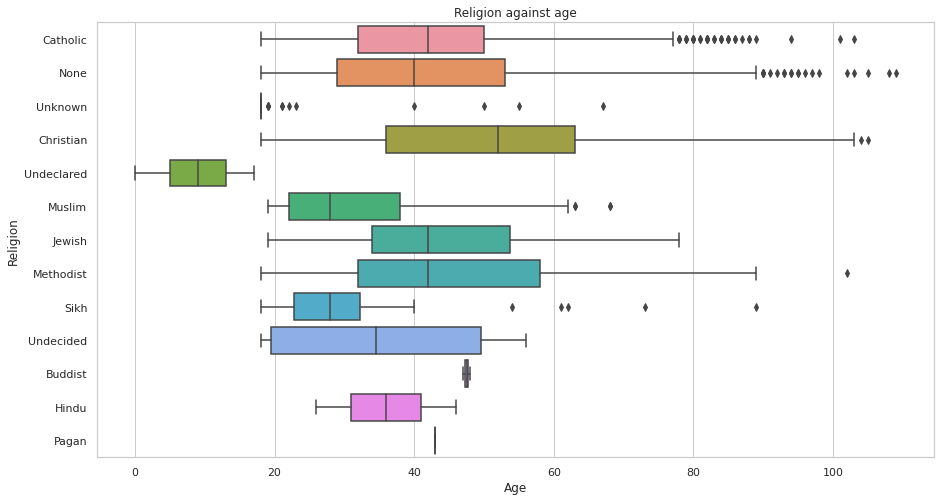

In [109]:
#Visualizing religion affiliation

import seaborn as sns

sns.set_style("whitegrid")

sns.boxplot(x = 'Age', y= 'Religion', data = df).set(title='Religion against age')
plt.savefig('religion-affiliations.png')

In [110]:
#Unemployment count by age(cleaned)

unemployed_cleaned = df.loc[df['Occupation'] == 'Unemployed']
unemployed_cleaned

House Number              Street First Name  Surname  Age  \
11               4          Leeds Lane     Hollie  Johnson   28   
28               8          Leeds Lane    Stephen    Jones   57   
36              11          Leeds Lane     Elliot     Dunn   40   
43              15          Leeds Lane      Carly    Brown   58   
72               1        Stanley Road     Sandra    Flynn   28   
...            ...                 ...        ...      ...  ...   
8202             1  Edwards Obervatory    Jasmine     Miah   27   
8220             1        Brooks House       Alan    Smith   26   
8221             1        Brooks House       Gary   Cooper   34   
8267             1       Gwynedd Manor    Valerie    Allen   49   
8268             1       Gwynedd Manor       Leah    Allen   42   

     Relationship to Head of House Marital Status  Gender  Occupation  \
11                            Wife        Married  Female  Unemployed   
28                          Lodger         Single    Male  Unemployed   
36                            Head       Divorced    Male  Unemployed   
43                            Head       Divorced  Female  Unemployed   
72                            Head         Single  Female  Unemployed   
...                            ...            ...     ...         ...   
8202                      Daughter       Divorced  Female  Unemployed   
8220                          None         Single    Male  Unemployed   
8221                          None         Single    Male  Unemployed   
8267                      Daughter         Single  Female  Unemployed   
8268                      Daughter       Divorced  Female  Unemployed   

     Infirmity   Religion  
11        None  Christian  
28        None     Jewish  
36        None   Catholic  
43        None   Catholic  
72        None       None  
...        ...        ...  
8202      None  Christian  
8220      None  Methodist  
8221      None       None  
8267      None  Christian  
8268      None  Christian  

[480 rows x 11 columns]

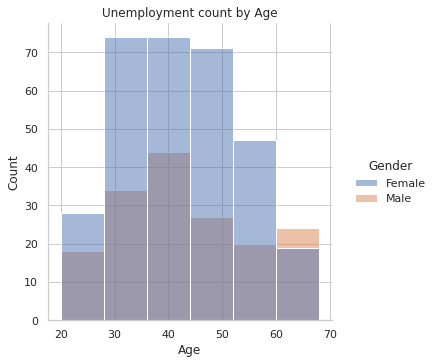

In [111]:
#Visualizing unemployment count by age

import seaborn as sns

sns.displot(data=unemployed_cleaned, x='Age', hue='Gender', binwidth=8).set(title='Unemployment count by Age')
plt.savefig('unemployment-count-by-age.png')

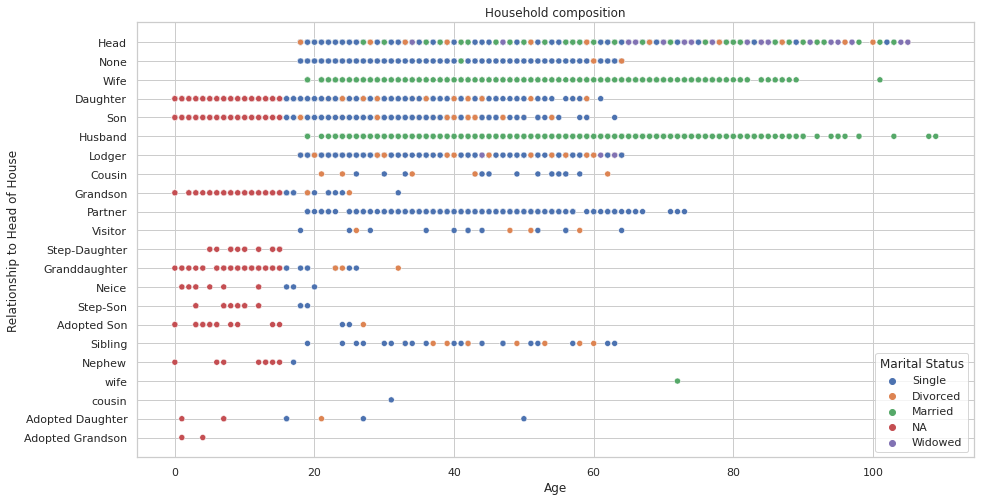

In [112]:
# Visualizing household composition
# plot the graph of relationship to head of house against age conditioned on marital status

sns.scatterplot(data=df, x='Age', y='Relationship to Head of House', hue='Marital Status').set(title='Household composition')
plt.savefig('household-composition.png')

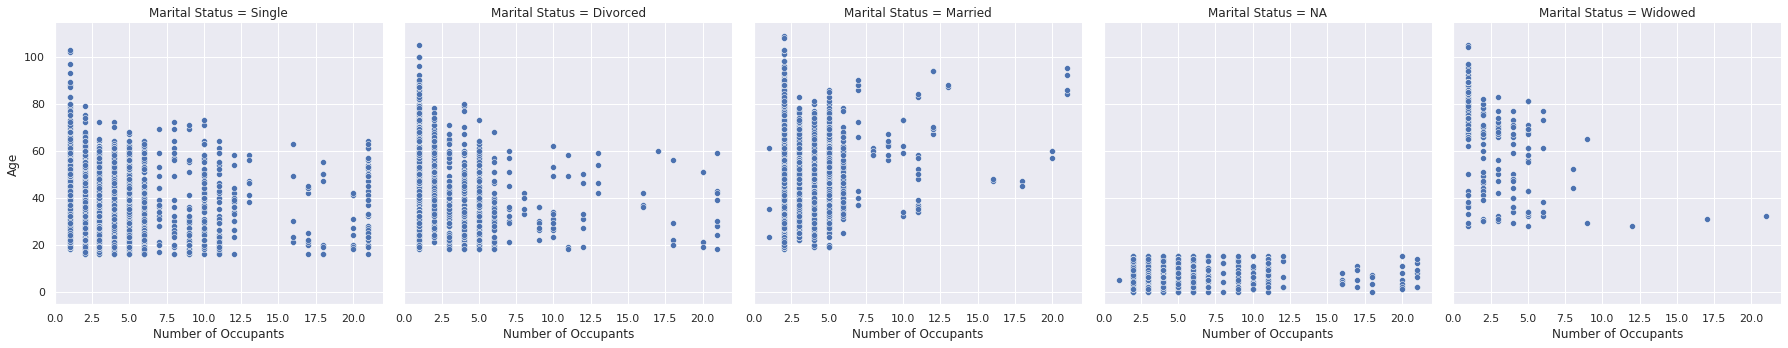

In [114]:
#Visualizing occupancy levels by marital status

import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})
sns.relplot(data=expanded_df, x='Number of Occupants', y='Age', col= 'Marital Status')
plt.savefig('Occupancy-level-by-marital-status.png')